#HARSHAL SINGH
#212SP009

	Q. 1 Write python code for  to Perform contrast stretching using Piecewise Linear transformation  functions on the input image shown  below according to the transfer function shown in the Figure. 

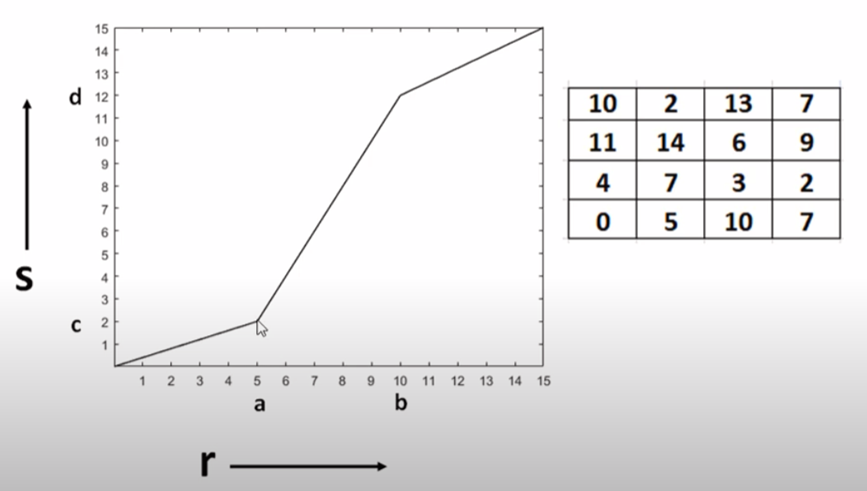

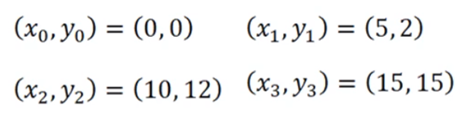

In [67]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import math
import cv2
import time
from numpy import fft
import cmath
import math
import copy


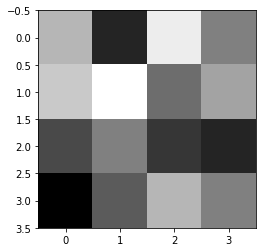

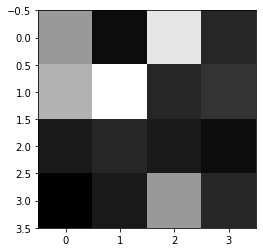

In [68]:
k= np.array([[10,2,13,7],[11,14,6,9],[4,7,3,2],[0,5,10,7]],dtype = 'float')
plt.imshow(k,cmap = 'gray')
plt.show()
for i in range(k.shape[0]):
    for j in range(k.shape[1]):
        if k[i][j] in range(0,10):
            k[i][j] = (0.4)*(k[i][j])
        elif k[i][j] in range(10,200):
            k[i][j] = 2*(k[i][j]-4) 
        else:
            k[i][j] = (3/5)*(k[i][j]-15) +15 
        k[i][j] = math.ceil(k[i][j])
plt.imshow(k, cmap = 'gray')
plt.show()

## Q2 Q.2. Implement in python of the following Matlab implemented concepts   (https://github.com/b1sakher/Contrast-enhancement-in-digital-images)

1. Local colour correction

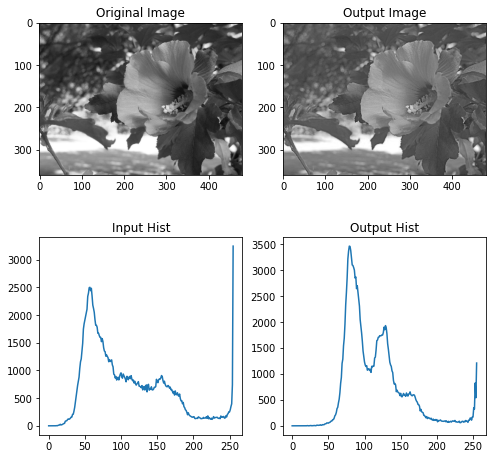

In [69]:
# Defining function for Local colour correction for single channel image
def loc_col_correction(image_path,choice):
    if choice==1:
        I=cv2.imread(image_path)/255  # normalizing the image
        I= (I[:,:,0] + I[:,:,1]+ I[:,:,2])/3.0
        sigma=2
        #Calculate the dft of the image using fft package
        DFT2d_I=np.fft.fft2(I)
   
   
        #Calculate dft of gaussian kernel
        Nr = np.fft.ifftshift([i for i in range(-I.shape[0]//2,I.shape[0]//2)])
        Nc = np.fft.ifftshift([i for i in range(-I.shape[1]//2,I.shape[1]//2)])
        [Nc,Nr] = np.meshgrid(Nc,Nr);
        power = (Nr/I.shape[0])**2+(Nc/I.shape[1])**2
        dft_gauss_kernel = power
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                dft_gauss_kernel[i][j] = math.exp(-2*(sigma**2)*(math.pi**2)*power[i][j])
        
        DFT2d_I_convolved=np.multiply(DFT2d_I,np.tile(dft_gauss_kernel,[1,1]))
        I_convolved=np.fft.ifft2(DFT2d_I_convolved)
        M=np.real(I_convolved)
        
        output = np.array(np.power(I,(2**(2*M-1)))*255, dtype = 'uint8')
        
    else:
        I=cv2.imread(image)/255  
        I= (I[:,:,0] + I[:,:,1]+ I[:,:,2])/3.0
        I = I*255
        sigma=2
        
        #Inverse image
        Inv=255 - I;
        
        DFT2d_I=np.fft.fft2(Inv);
        
        Nr = np.fft.ifftshift([i for i in range(-I.shape[0]//2,I.shape[0]//2)])
        Nc = np.fft.ifftshift([i for i in range(-I.shape[1]//2,I.shape[1]//2)])
        [Nc,Nr] = np.meshgrid(Nc,Nr);
        power = (Nr/I.shape[0])**2+(Nc/I.shape[1])**2
        dft_gauss_kernel = power
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                dft_gauss_kernel[i][j] = math.exp(-2*(sigma**2)*(math.pi**2)*power[i][j])
        
        DFT2d_I_convolved=np.multiply(DFT2d_I,np.tile(dft_gauss_kernel,[1,1]))
        I_convolved=np.fft.ifft2(DFT2d_I_convolved)
        M=np.real(I_convolved)
        output = 255*np.power(I/255,2**((128-M)/128))
        output = np.array(output,dtype = 'uint8')
    return output
image_path = r'/content/Rose.jpg'
image = cv2.imread(image_path,0)
output = loc_col_correction(image_path,1)
input_hist= cv2.calcHist([image],[0],None,[256],[0,256])
output_hist = cv2.calcHist([output],[0],None,[256],[0,256])
plt.subplots(figsize = (8,8))
plt.subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(output, cmap = 'gray')
plt.title('Output Image')
        
plt.subplot(2,2,3)
plt.plot(input_hist)
plt.title('Input Hist')
        
plt.subplot(2,2,4)
plt.plot(output_hist)
plt.title('Output Hist')
        
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

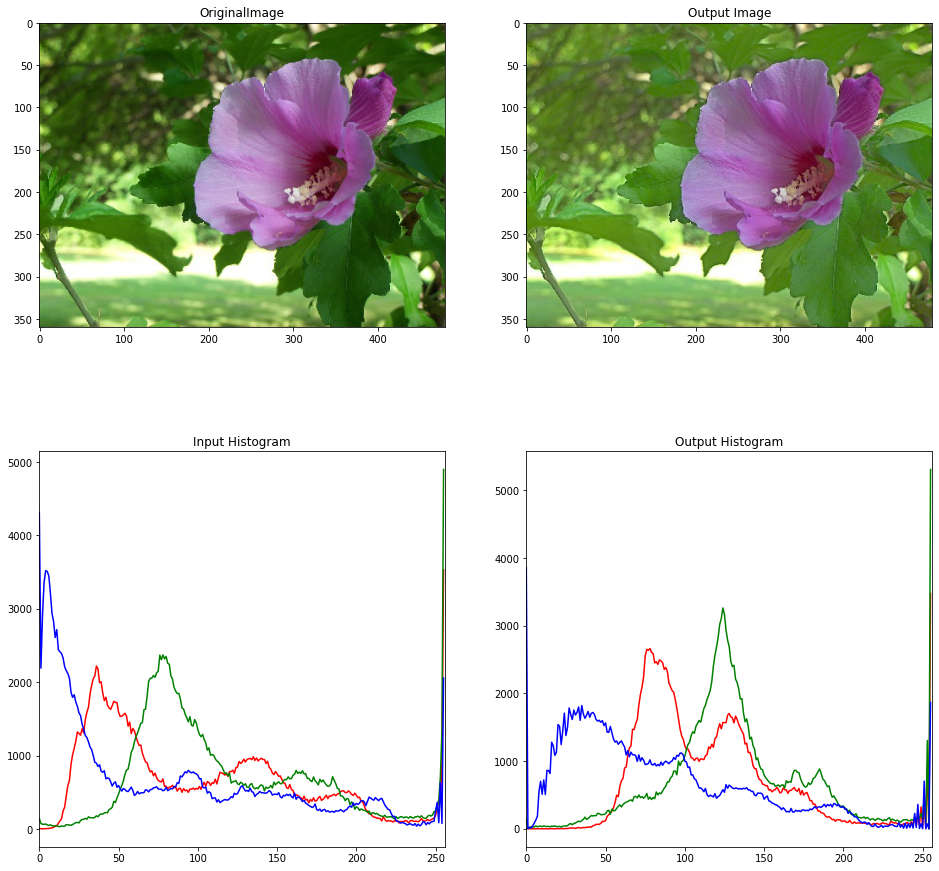

In [70]:
# Local colour correction for RGB image
def loc_col_correction_RGB(image_path,choice):
    I=cv2.imread(image_path)/255  
    sigma=2
    B = I[:,:,0]
    G = I[:,:,1]
    R = I[:,:,2]
    #Calculate the dft of the image
    DFT2d_R=np.fft.fft2(R)
    DFT2d_G=np.fft.fft2(G)
    DFT2d_B=np.fft.fft2(B)
    #Calculate dft of gaussian kernel
    Nr = np.fft.ifftshift([i for i in range(-I.shape[0]//2,I.shape[0]//2)])
    Nc = np.fft.ifftshift([i for i in range(-I.shape[1]//2,I.shape[1]//2)])
    [Nc,Nr] = np.meshgrid(Nc,Nr);
    power = (Nr/I.shape[0])**2+(Nc/I.shape[1])**2
    dft_gauss_kernel = power
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            dft_gauss_kernel[i][j] = math.exp(-2*(sigma**2)*(math.pi**2)*power[i][j])
                                              
    DFT2d_R_convolved=np.multiply(DFT2d_R,np.tile(dft_gauss_kernel,[1,1]))
    DFT2d_G_convolved=np.multiply(DFT2d_G,np.tile(dft_gauss_kernel,[1,1]))
    DFT2d_B_convolved=np.multiply(DFT2d_B,np.tile(dft_gauss_kernel,[1,1]))
    R_convolved=np.fft.ifft2(DFT2d_R_convolved)
    M=np.real(R_convolved)
    G_convolved=np.fft.ifft2(DFT2d_G_convolved)
    M=np.real(R_convolved)
    B_convolved=np.fft.ifft2(DFT2d_B_convolved)
    M=np.real(R_convolved)

    output_R = np.array(np.power(R,(2**(2*M-1)))*255, dtype = 'uint8')
    output_G = np.array(np.power(G,(2**(2*M-1)))*255, dtype = 'uint8')
    output_B = np.array(np.power(B,(2**(2*M-1)))*255, dtype = 'uint8')

    output = cv2.merge((output_R,output_G,output_B))
    return output
        
image_path = r'/content/Rose.jpg'
image = plt.imread(image_path)
output = loc_col_correction_RGB(image_path,1)

plt.subplots(figsize = (16,16))
plt.subplot(2,2,1)
plt.imshow(image)
plt.title('OriginalImage')

plt.subplot(2,2,2)
plt.imshow(output)
plt.title('Output Image')
                                              
color = ('r','g','b')
for channel,col in enumerate(color):        
    input_hist = cv2.calcHist([image],[channel],None,[256],[0,256])
    plt.subplot(2,2,3)
    plt.plot(input_hist,color = col)                                            
    plt.xlim([0,256])
plt.title('Input Histogram')
        
color = ('r','g','b')
for channel,col in enumerate(color):        
    output_hist = cv2.calcHist([output],[channel],None,[256],[0,256])
    plt.subplot(2,2,4)
    plt.plot(output_hist,color = col)                                            
    plt.xlim([0,256])
plt.title('Output Histogram')
        
plt.show()

2. Simplest colour correction

In [71]:
def simple_color_corr(image_path, s):
    I = cv2.imread(image_path)
    I = np.array(I, dtype = 'float')
    I= (I[:,:,0] + I[:,:,1]+ I[:,:,2])/3.0
    pageSize = I.shape[0]*I.shape[1]
    
    I_arr=np.reshape(I,(1,pageSize))
    I_arr_sort=np.sort(I_arr)
    s1=s/2.0
    s2=s1
    pos_v_min=math.floor(pageSize * s1 / 100)
    pos_v_max=math.floor((pageSize * (1 - (s2/100))) - 1)
    v_min=I_arr_sort[:,pos_v_min-1]
    v_max=I_arr_sort[:,pos_v_max-1]
    for i in range(pageSize):
        if I_arr[:,i] < v_min:
            I_arr[:,i] = v_min
        elif I_arr[:,i] > v_max:
            I_arr[:,i] = v_max
        else:
            continue
    mul_fact = (255-0)/(v_max-v_min)
    output = mul_fact*(I_arr-v_min)
    output = np.reshape(output,I.shape)
    return output.astype('uint8')

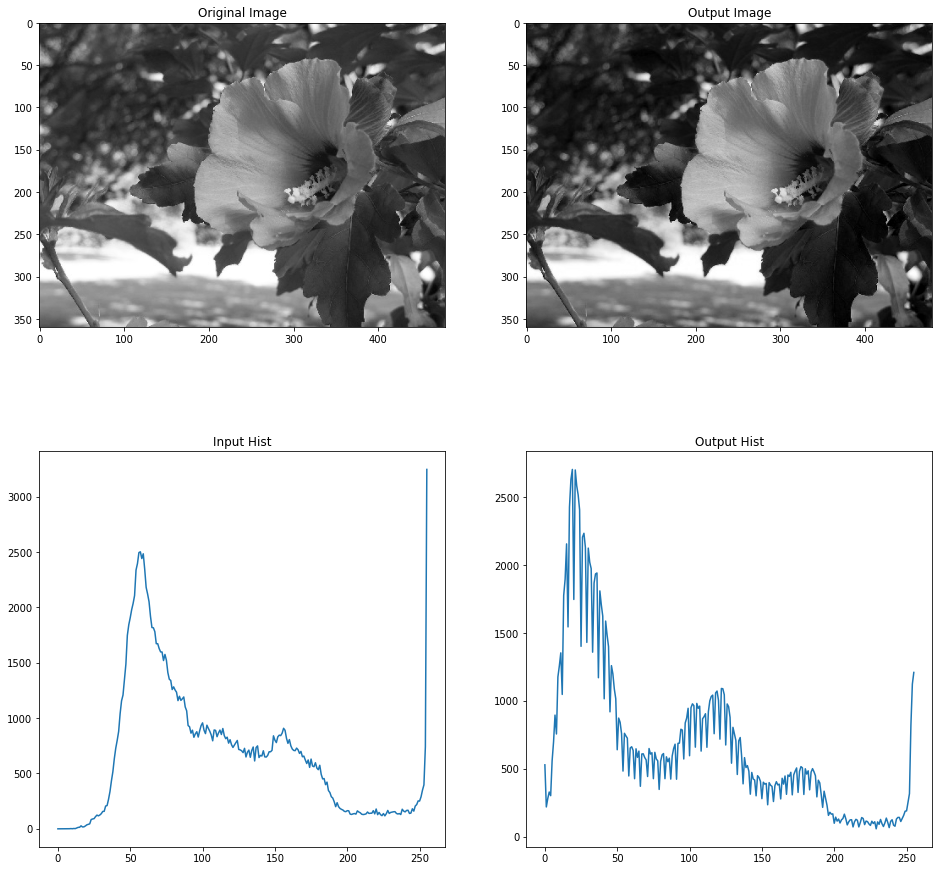

In [72]:
image_path = r'/content/Rose.jpg'
image = cv2.imread(image_path,0)

output = simple_color_corr(image_path,0.5)
input_hist= cv2.calcHist([image],[0],None,[256],[0,256])
output1_hist = cv2.calcHist([output],[0],None,[256],[0,256])
plt.subplots(figsize = (16,16))
plt.subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(output, cmap = 'gray')
plt.title('Output Image')

plt.subplot(2,2,3)
plt.plot(input_hist)
plt.title('Input Hist')
        
plt.subplot(2,2,4)
plt.plot(output1_hist)
plt.title('Output Hist')
plt.show()

In [73]:
# for single channel wihout mean
def simple_color_corr_(I, s):
    I = np.array(I, dtype = 'float')
    pageSize = I.shape[0]*I.shape[1]
    
    I_arr=np.reshape(I,(1,pageSize))
    I_arr_sort=np.sort(I_arr)
    s1=s/2.0
    s2=s1
    pos_v_min=math.floor(pageSize * s1 / 100)
    pos_v_max=math.floor((pageSize * (1 - (s2/100))) - 1)
    v_min=I_arr_sort[:,pos_v_min-1]
    v_max=I_arr_sort[:,pos_v_max-1]
    for i in range(pageSize):
        if I_arr[:,i] < v_min:
            I_arr[:,i] = v_min
        elif I_arr[:,i] > v_max:
            I_arr[:,i] = v_max
        else:
            continue
    mul_fact = (255-0)/(v_max-v_min)
    output = mul_fact*(I_arr-v_min)
    output = np.reshape(output,I.shape)
    return output.astype('uint8')
def simple_color_corr_RGB(image_path,s):
    image = cv2.imread(image_path)
    b,g,r = cv2.split(image)
    B_simple_color_corr = simple_color_corr_(b,s)
    G_simple_color_corr = simple_color_corr_(g,s)
    R_simple_color_corr = simple_color_corr_(r,s)
    output = cv2.merge((R_simple_color_corr, G_simple_color_corr, B_simple_color_corr))
    
    return output
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

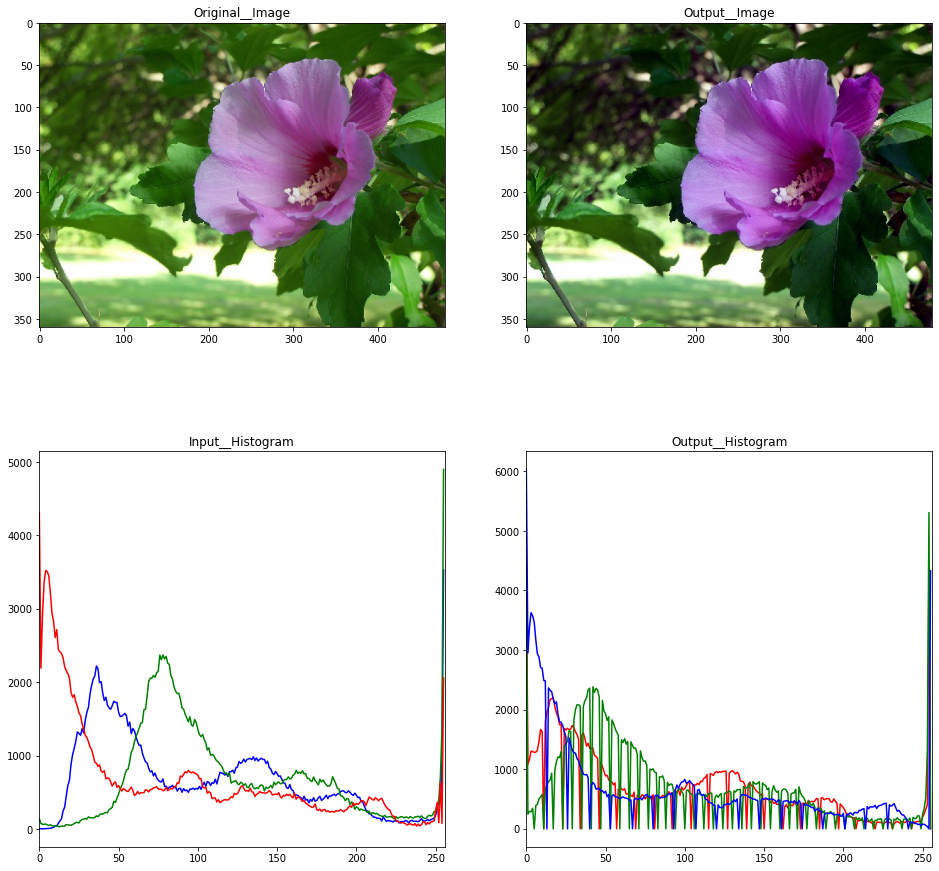

In [74]:
image_path = r'/content/Rose.jpg'
image = plt.imread(image_path)
output = simple_color_corr_RGB(image_path,5)
plt.subplots(figsize = (16,16))
plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original__Image')

plt.subplot(2,2,2)
plt.imshow(output)
plt.title('Output__Image')

color = ('b','g','r')
for channel,col in enumerate(color):        
    input_hist = cv2.calcHist([image],[channel],None,[256],[0,256])
    plt.subplot(2,2,3)
    plt.plot(input_hist,color = col)                                            
    plt.xlim([0,256])
plt.title('Input__Histogram')
        
color = ('r','g','b')
for channel,col in enumerate(color):        
    output_hist = cv2.calcHist([output],[channel],None,[256],[0,256])
    plt.subplot(2,2,4)
    plt.plot(output_hist,color = col)                                            
    plt.xlim([0,256])
plt.title('Output__Histogram')
        
plt.show()

3. Screened Poission Equation for Image contrast Enhancement

## Q4

In [83]:
# defining function for RGB2YIQ
def RGB2YIQ(Img):
    #normalizing the images
    YIQ=np.zeros(Img.shape)
    for i in range(Img.shape[0]):
        for j in range(Img.shape[1]):
            YIQ[i,j,0]=0.299*Img[i,j,0]+0.587*Img[i,j,1]+0.114*Img[i,j,2];
            YIQ[i,j,1]=0.596*Img[i,j,0]-0.274*Img[i,j,1]-0.322*Img[i,j,2];
            YIQ[i,j,2]=0.211*Img[i,j,0]-0.523*Img[i,j,1]+0.312*Img[i,j,2];
    return YIQ

def YIQ2RGB(Img):
   
    RGB=np.zeros(Img.shape)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            RGB[i,j,0]= output[i,j,0]+0.9562*output[i,j,1]+0.6214*output[i,j,2];
            RGB[i,j,1]= output[i,j,0]-0.2727*output[i,j,1]-0.6468*output[i,j,2];
            RGB[i,j,2]= output[i,j,0]-1.1037*output[i,j,1]+1.7006*output[i,j,2];
    return RGB

In [84]:
import cv2
import numpy as np
pi = np.pi
# defining function for RGB2HSI
def RGB2HSI(rgb_img):
    #pass normalize images
    R,G,B = cv2.split(rgb_img)
    row,col,_ = rgb_img.shape 
    hsi_img = rgb_img.copy()
    H = np.zeros((row, col))
    I = (R + G + B)/3.0        
    S = np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            den = np.sqrt((R[i][j]-G[i][j])** 2 +(R[i][j]-B[i][j])*(G[i][j]-B[i][j]))
            num = 0.5 *(R[i][j]-B[i][j]+R[i][j]-G[i][j])
            thetha = np.arccos(num/(den+0.0001))
            if B[i][j]<=G[i][j]:
                H[i][j] = thetha
            else:
                H[i][j] = 2*pi - thetha
    S = 1 -np.minimum(np.minimum(R,G),B)* (3/(R+B+G+0.0001))
    hsi_img = cv2.merge((H/(2*pi),S,I))
    return hsi_img
def HSI2RGB(hsi_img) : 
    row,col,_ = hsi_img.shape 
    rgb_img = hsi_img.copy()
    H,S,I = cv2.split(hsi_img)
    H = np.multiply(2*pi,H)
    R,G,B = H,S,I
    for i in range(row):
        for j in range(col):
            if 0<=H[i][j]<(2*pi)/3:
                B[i][j] = I[i][j]*(1-S[i][j])
                R[i][j] = I[i][j]*(1+ (S[i][j]*np.cos(H[i][j]))/(np.cos((pi/3)-H[i][j])))
                G[i][j] = 3*I[i][j] - (R[i][j] + B[i][j])
            elif (2*pi)/3<=H[i][j]< (4*pi)/3:
                H[i][j] = H[i][j] - (2*pi)/3
                R[i][j] = I[i][j]*(1-S[i][j])
                G[i][j] = I[i][j]*(1+ (S[i][j]*np.cos(H[i][j]))/(np.cos((pi/3)-H[i][j])))
                B[i][j] = 3*I[i][j] - (R[i][j] + G[i][j])
            elif 4*(pi/3)<=H[i][j]<2*pi :
                H[i][j] = H[i][j] - (4*pi)/3
                B[i][j] = I[i][j]*(1-S[i][j])
                R[i][j] = I[i][j]*(1+ (S[i][j]*np.cos(H[i][j]))/(np.cos((pi/3)-H[i][j])))
                G[i][j] = 3*I[i][j] - (R[i][j] + B[i][j])
                
    rgb_img[:,:,0] = R
    rgb_img[:,:,1] = G
    rgb_img[:,:,2] = B
    return rgb_img

 RGB2YIQ

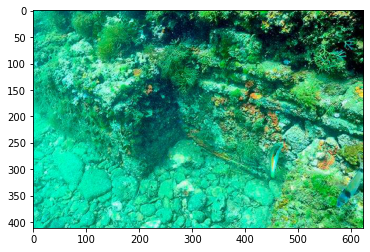

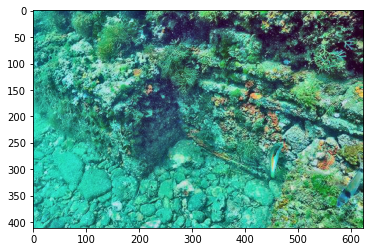

In [85]:
path = r"/content/underwater.jpg"
Img= plt.imread(path)/255.0
plt.imshow(Img)
plt.show()
YIQ = RGB2YIQ(Img)
Y_denorm = (YIQ[:,:,0]*255).astype('uint8')
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(16, 16))
img_cl = clahe.apply(Y_denorm)

output = cv2.merge(((img_cl)/255.0 , YIQ[:,:,1], YIQ[:,:,2]))

RGB= YIQ2RGB(output)
RGB1 =np.round((RGB*255))
R,G,B = cv2.split(RGB1)

R1 = (R - np.min(R))/(np.max(R)-np.min(R))
G1 = (G - np.min(G))/(np.max(G)-np.min(G))
B1 = (B - np.min(B))/(np.max(B)-np.min(B))

RGB_final_YIQ = cv2.merge((R1,G1,B1))
plt.imshow((RGB_final_YIQ))
plt.show()


RGB2HSI

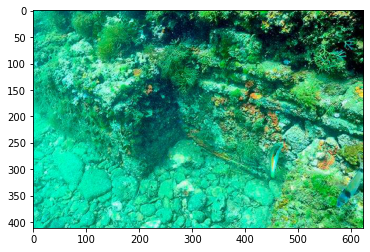

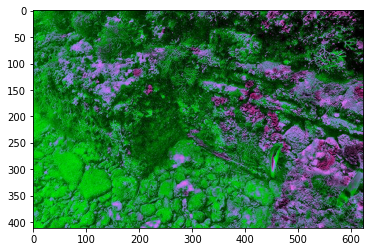

In [86]:
Img= plt.imread(path)/255.0
plt.imshow(Img)
plt.show()

HSI_img = RGB2HSI(Img)
RGB_normal= HSI2RGB(HSI_img)

I_denorm = (HSI_img[:,:,2]*255).astype('uint8')
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(16, 16))
img_cl = clahe.apply(I_denorm)

output = cv2.merge((HSI_img[:,:,0], HSI_img[:,:,1],(img_cl)/255.0))

RGB= HSI2RGB(output)
RGB1 =np.round((RGB*255))
R,G,B = cv2.split(RGB1)

R1 = (R - np.min(R))/(np.max(R)-np.min(R))
G1 = (G - np.min(G))/(np.max(G)-np.min(G))
B1 = (B - np.min(B))/(np.max(B)-np.min(B))

RGB_final_HSI = cv2.merge((R1,G1,B1))

plt.imshow(RGB_final_HSI)
plt.show()

In [87]:
RGB_fusion = np.sqrt(RGB_final_HSI**2 + RGB_final_YIQ**2)
Rf,Gf,Bf = cv2.split(0.72*RGB_fusion)

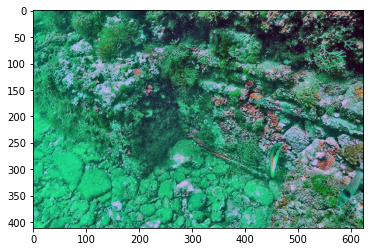

In [88]:
gamma = 1/RGB_fusion.max()
plt.imshow(gamma*RGB_fusion)
plt.show()

sobel edge detector

In [89]:
def rot45_CCW(arr):
    rot_arr = arr.copy()
    rot_arr[0][0] = arr[0][1]
    rot_arr[0][1] = arr[0][2]
    rot_arr[0][2] = arr[1][2]
    rot_arr[1][0] = arr[0][0]
    rot_arr[1][2] = arr[2][2]
    rot_arr[2][0] = arr[1][0]
    rot_arr[2][1] = arr[2][0]
    rot_arr[2][2] = arr[2][1]
    return rot_arr
    

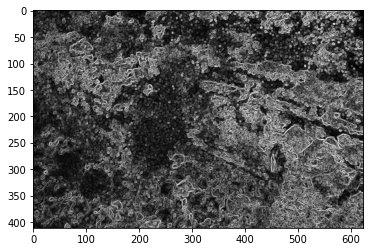

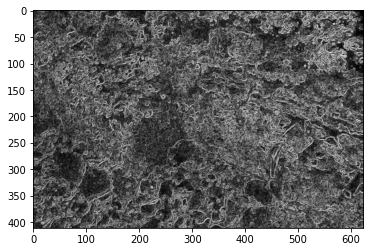

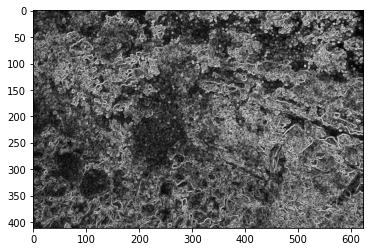

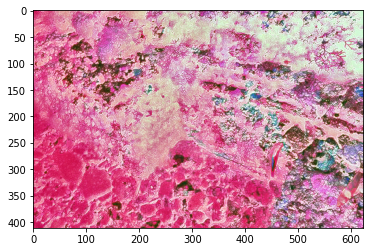

In [90]:
S = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
def grad_vect_img(img,S,a,b):
    S1 = S
    S2 = rot45_CCW(S1)
    S3 = rot45_CCW(S2)
    S4 = rot45_CCW(S3)
    G1 = cv2.filter2D(img, -1, S1)
    G2 = cv2.filter2D(img, -1, S2)
    G3 = cv2.filter2D(img, -1, S3)
    G4 = cv2.filter2D(img, -1, S4)
    G_final = np.sqrt(G1**2+G2**2+G3**2+G4**2)
    G_norm = np.log(G_final+1)/(np.log(np.max(G_final)+1))
    plt.imshow(G_norm, cmap = 'gray')
    plt.show()
    lamda = 2**(a*G_norm) + b
    return lamda
lamda_R = grad_vect_img(Rf,S,2,0)
lamda_G = grad_vect_img(Gf,S,2,0)
lamda_B = grad_vect_img(Bf,S,2,0)

R_GLR = 1/((Rf**lamda_R) + 1)
G_GLR = 1/((Gf**lamda_G) + 1)
B_GLR = 1/((Bf**lamda_B) + 1)

RGB_GLR = cv2.merge((R_GLR,G_GLR,B_GLR))
RGB1 =np.round((RGB_GLR*255))
R,G,B = cv2.split(RGB1)

Rout = (R - np.min(R))/(np.max(R)-np.min(R))
Gout = (G - np.min(G))/(np.max(G)-np.min(G))
Bout = (B - np.min(B))/(np.max(B)-np.min(B))

RGB_out = cv2.merge((Rout,Gout,Bout))
plt.imshow((RGB_out))
plt.show()